# Generate data from HMM model
Running this notebook will:

- create 9 Hidden Markov Models
- show and save plots of some data generated from these models
- generate more X and Z samples and create a dataframe with true labels 
- save used models and generated data to pickle file

In [1]:
import pandas as pd
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt
import pickle
from time import time
import os

DATA_DIR = "./data_HMM"
GENERATING_MODEL_NAME = "HMM"
N_TRAIN_SAMPLES_PER_MODEL = 25  # 9 models
N_TEST_SAMPLES_PER_MODEL = 100
MIN_SAMPLE_LEN = 128
MAX_SAMPLE_LEN = 128

DESCRIPTION = ""
UNBALANCED = True
unb = "_unbal" if UNBALANCED else ""
FILENAME_SUFFIX = f"{GENERATING_MODEL_NAME}_data_ntrain{N_TRAIN_SAMPLES_PER_MODEL}_min{MIN_SAMPLE_LEN}_max{MAX_SAMPLE_LEN}{unb}"

time_index = int(time())

if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)

## Define models

In [2]:
def define_HMM(n_components: int, covariance_type: str, means_: np.ndarray, 
               covars_: np.ndarray, startprob_: np.ndarray, transmat_: np.ndarray) -> hmm.GaussianHMM:
    """Create an instance of hmm.GaussianHMM and set all variables necessary to generate data."""
    # if sum(startprob_) != 1:
    #     print(f"{startprob_ = }")
    #     raise ValueError(f"Sum of startprob_ (= {sum(startprob_)}) must be 1.")
    # for i, row in enumerate(transmat_):
    #     if sum(row) != 1:
    #         print(f"{row = }")
    #         raise ValueError(f"Sum of row {i} of transition matrix (= {sum(row)}) must be 1.")

    model = hmm.GaussianHMM(n_components= n_components, covariance_type= covariance_type) 
    model.means_ = means_
    model.covars_ = covars_
    model.startprob_ = startprob_
    model.transmat_ = transmat_
    return model

In [3]:
model1 = define_HMM(
    n_components = 2, covariance_type = "diag", 
    means_ = np.array([[0.5],[100]]), 
    covars_ = np.array([[0.001],[10]]),
    startprob_ = np.array([0.8, 0.2]), 
    transmat_ = np.array([[0.9, 0.1],
                          [0.5, 0.5]])
)

model2 = define_HMM(
    n_components = 2, covariance_type = "diag",
    means_ = np.array([[0.5],[98]]),
    covars_ = np.array([[0.001],[4]]),
    startprob_ = np.array([0.7, 0.3]),
    transmat_ = np.array([[0.8, 0.2],
                          [0.6, 0.4]])
)

model3 = define_HMM(
    n_components = 2, covariance_type = "diag",
    means_ = np.array([[0.5],[50]]),
    covars_ = np.array([[0.001],[5]]),
    startprob_ = np.array([0.3, 0.7]),
    transmat_ = np.array([[0.6, 0.4],
                          [0.2, 0.8]])
)

model4 = define_HMM(
    n_components= 1, covariance_type= "diag",
    means_ = np.array([[100]]),
    covars_ = np.array([[30]]),
    startprob_ = np.array([1]),
    transmat_ = np.array([[1]]),
)

model5 = define_HMM(
    n_components= 1, covariance_type= "diag",
    means_ = np.array([[50]]),
    covars_ = np.array([[1]]),
    startprob_ = np.array([1]),
    transmat_ = np.array([[1]]),
)

model6 = define_HMM(
    n_components= 1, covariance_type= "diag",
    means_ = np.array([[100]]),
    covars_ = np.array([[1]]),
    startprob_ = np.array([1]),
    transmat_ = np.array([[1]]),
)

model7 = define_HMM(
    n_components= 5, covariance_type= "diag",
    means_ = np.array([[0.1],[20],[30],[200],[300]]),
    covars_ = np.array([[0.001],[0.2],[0.3],[0.5],[0.5]]),
    startprob_ = np.array([0.6, 0.1, 0.1, 0.1, 0.1]),
    transmat_ = np.array([[0.6, 0.0, 0.1, 0.1, 0.2],
                          [0.1, 0.8, 0.05, 0.04, 0.01],
                          [0.1, 0.05, 0.8, 0.04, 0.01],    
                          [0.05, 0.2, 0.02, 0.7, 0.03], 
                          [0.3, 0.03, 0.03, 0.04, 0.6]
                         ])
)

model8 = define_HMM(
    n_components= 3, covariance_type= "diag",
    means_ = np.array([[0.1],[50], [100]]),
    covars_ = np.array([[0.001],[5], [5]]),
    startprob_ = np.array([0.1, 0.7, 0.2]),
    transmat_ = np.array([[0.6, 0.4, 0.0],
                          [0.1, 0.8, 0.1],
                          [0.7, 0.01, 0.29]
                         ])
)

model9 = define_HMM(
    n_components= 3, covariance_type= "diag",
    means_ = np.array([[1],[30], [45]]),
    covars_ = np.array([[0.001],[5], [5]]),
    startprob_ = np.array([0.1, 0.7, 0.2]),
    transmat_ = np.array([[0.5, 0.4, 0.1],
                          [0.1, 0.6, 0.3],
                          [0.2, 0.51, 0.29]
                         ])
)

models_lst = [model1, model2, model3, model4, model5, model6, model7, model8, model9]

## Show plots

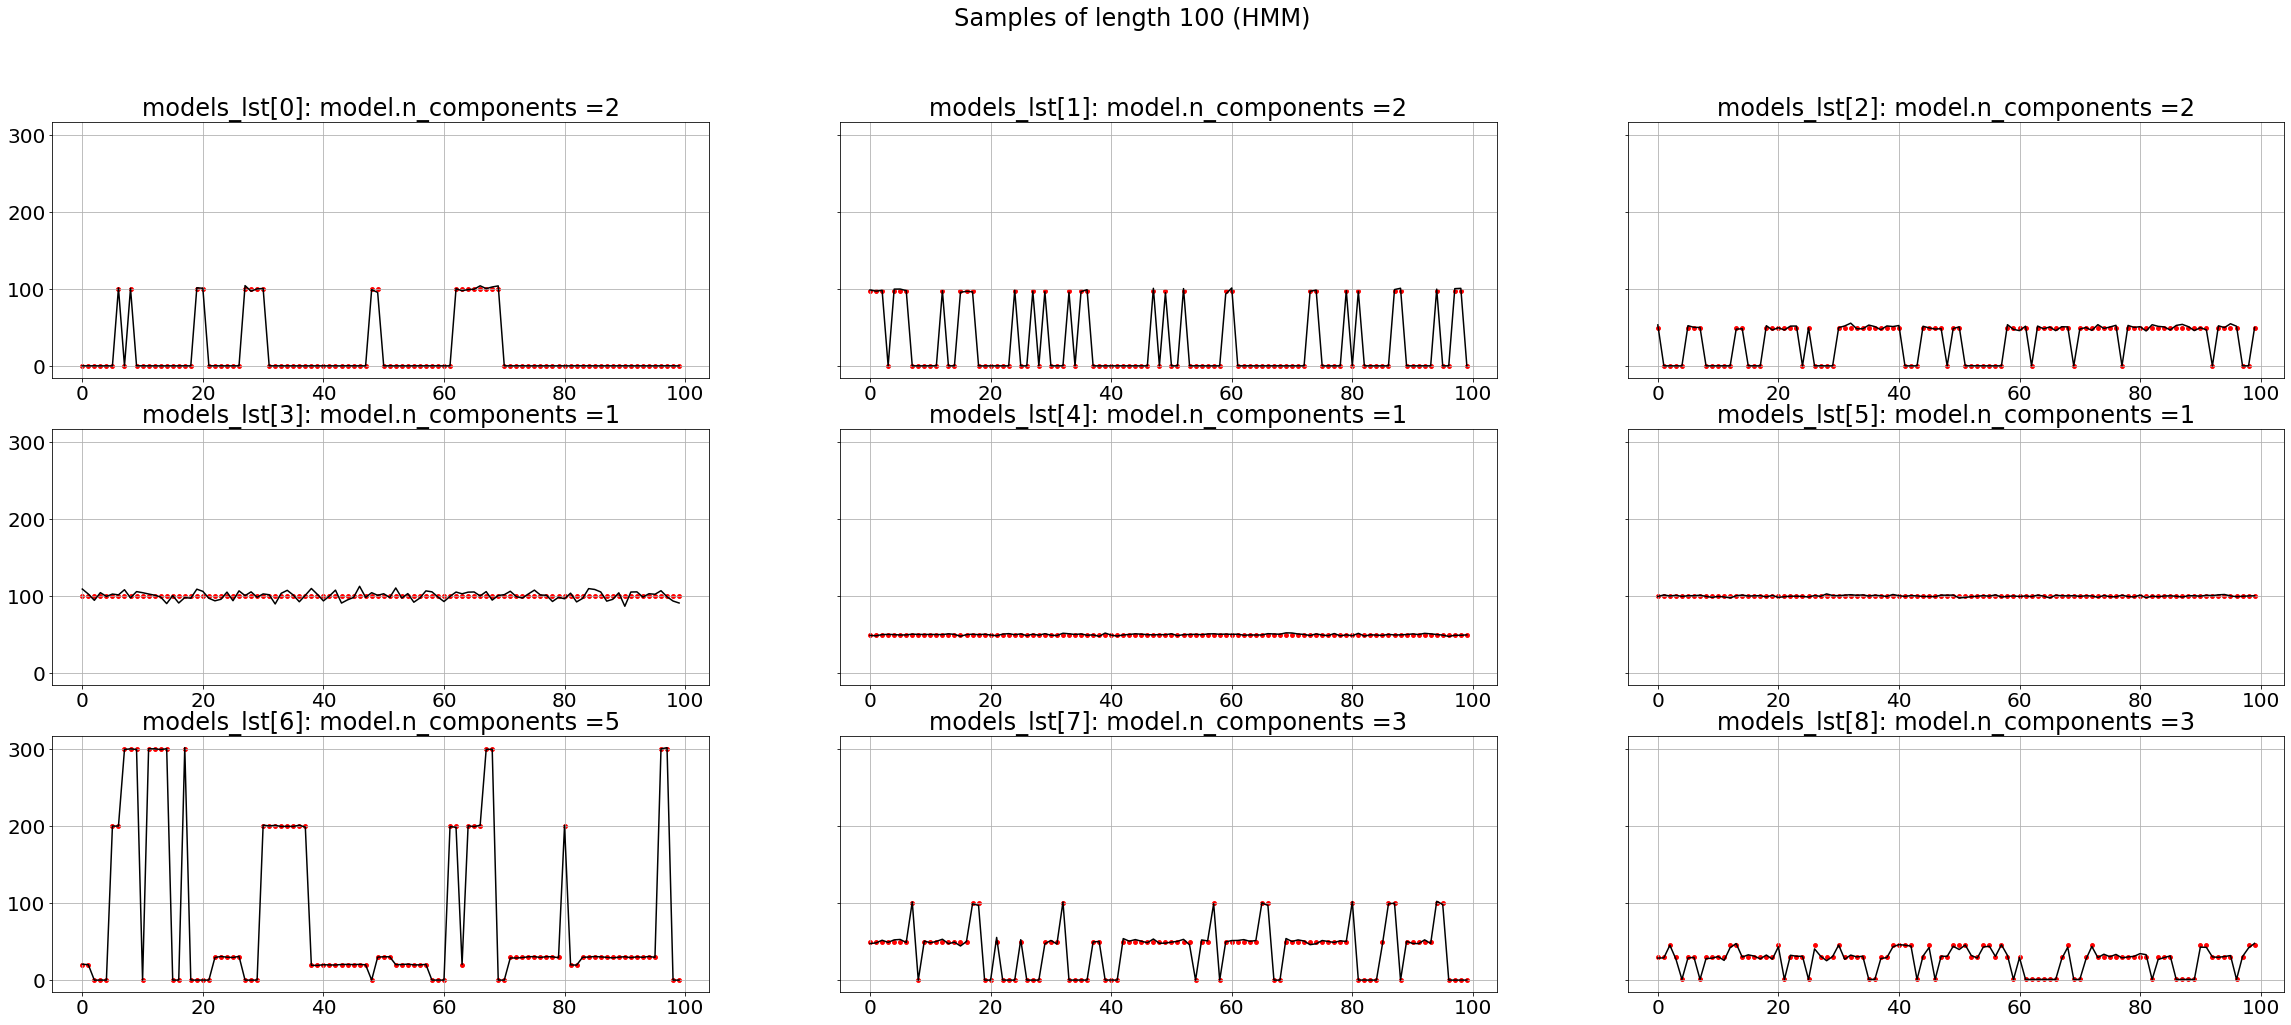

In [4]:
n = 100
plt.rcParams["figure.figsize"] = (40, 16)
plt.rcParams['font.size'] = 20
fig, axes = plt.subplots(3,3, sharey="all")
plt.suptitle(f"Samples of length {n} (HMM)")
for i, ax in enumerate(axes.reshape(-1)):
    model = models_lst[i]
    try:
        X,Z = model.sample(n)
    except Exception as e:
        print(f"Error in model {i}: {e}")
        continue
        
    means = [model.means_[hidden_state] for hidden_state in Z]
    ax.plot(X, color = "black")
    ax.scatter(np.array(range(len(Z))), means, color = "red", s = 15)
    ax.set_title(f"models_lst[{i}]: {model.n_components =}")
    ax.grid()
    
plt.savefig(f"./plots/models_{GENERATING_MODEL_NAME}_{time_index}.jpg")
plt.show()

## Generate all data

In [5]:
WEIGHTS =  [0.3, 0.05, 0.3, 0.05, 0.05, 0.1, 0.01, 0.03, 0.02]

all_X_samples = []
all_Z_samples = []
true_labels = []
sample_lengths = []
sample_ids = []
train_samples_ids = []
test_samples_ids = []
possible_lenghts = range(MIN_SAMPLE_LEN, MAX_SAMPLE_LEN + 1)

total_train = len(models_lst)* N_TRAIN_SAMPLES_PER_MODEL
total_test = len(models_lst)* N_TEST_SAMPLES_PER_MODEL
id = 0
for i in range(len(models_lst)):
    model = models_lst[i]
    curr_no_train = int(np.ceil(total_train * WEIGHTS[i])) if UNBALANCED else N_TRAIN_SAMPLES_PER_MODEL
    curr_no_test = N_TEST_SAMPLES_PER_MODEL # test are balanced always
    print(f"Generating {curr_no_train} train and {curr_no_test} test samples from model {i}.")
    for _ in range(curr_no_train):
        sample_len = np.random.choice(possible_lenghts)
        X,Z = model.sample(sample_len)
        all_X_samples.append(X)
        all_Z_samples.append(Z)
        sample_lengths.append(sample_len)
        true_labels.append(i)
        sample_ids.append(id)
        train_samples_ids.append(id)
        id += 1
        
    for _ in range(curr_no_test):
        sample_len = np.random.choice(possible_lenghts)
        X,Z = model.sample(sample_len)
        all_X_samples.append(X)
        all_Z_samples.append(Z)
        sample_lengths.append(sample_len)
        true_labels.append(i)
        sample_ids.append(id)
        test_samples_ids.append(id)
        id += 1

labels_df = pd.DataFrame({
    "sample_id": sample_ids,
    "true_label": true_labels,
    "sample_len": sample_lengths
})

Generating 68 train and 100 test samples from model 0.
Generating 12 train and 100 test samples from model 1.
Generating 68 train and 100 test samples from model 2.
Generating 12 train and 100 test samples from model 3.
Generating 12 train and 100 test samples from model 4.
Generating 23 train and 100 test samples from model 5.
Generating 3 train and 100 test samples from model 6.
Generating 7 train and 100 test samples from model 7.
Generating 5 train and 100 test samples from model 8.


## Prepare splits

In [6]:
indices_split = {
    "train_samples_ids": train_samples_ids, 
    "test_samples_ids": test_samples_ids}

indices_splits_lst = [indices_split]
print(len(indices_split["train_samples_ids"]), len(indices_split["test_samples_ids"]))


210 900


## Save the data

In [7]:
data_filename = f"{FILENAME_SUFFIX}_{time_index}.pkl"
output_path = f"{DATA_DIR}/{data_filename}"

metadata = {
    "N_TRAIN_SAMPLES_PER_MODEL": N_TRAIN_SAMPLES_PER_MODEL,
    "N_TEST_SAMPLES_PER_MODEL": N_TEST_SAMPLES_PER_MODEL,
    "MAX_SAMPLE_LEN": MAX_SAMPLE_LEN,
    "MIN_SAMPLE_LEN": MIN_SAMPLE_LEN
}

data = {
    'generating_model': GENERATING_MODEL_NAME,
    'data_filename': data_filename,
    'time_index': time_index,
    'models_lst': models_lst,
    'labels_df': labels_df,
    'all_X_samples': all_X_samples,
    'all_Z_samples': all_Z_samples,
    'indices_splits_lst': indices_splits_lst,
    'metadata': metadata,
    'description': DESCRIPTION
}

with open(output_path, 'wb') as f:
    pickle.dump(data, f)
    print(f"Data saved to {output_path}.")

Data saved to ./data_HMM/HMM_data_ntrain25_min128_max128_unbal_1662222322.pkl.


## Examine labels_dtf and samples

In [8]:
all_X_samples[0].shape

(128, 1)

In [9]:
labels_df

,sample_id,true_label,sample_len
0,0,0,128
1,1,0,128
2,2,0,128
3,3,0,128
4,4,0,128
...,...,...,...
1105,1105,8,128
1106,1106,8,128
1107,1107,8,128
1108,1108,8,128
